#### This program predicts if a patient has cancer based off of data.

##### import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pickle
%matplotlib inline

In [3]:
#reading the data to the notebook
data = pd.read_csv(r'C:\Users\User\Desktop\PROGRAMMING ITEMS\cancer_data.csv')

In [4]:
#The number of rows and colunms in the dataset
data.shape

(569, 6)

In [5]:
#lets take a look at the data set
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [6]:
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [7]:
#lets see if we have missing values
data.isna()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
564,False,False,False,False,False,False
565,False,False,False,False,False,False
566,False,False,False,False,False,False
567,False,False,False,False,False,False


In [8]:
#lets get the total number of missing values in each column
data.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

#### Clearly the data is clean without missing values

In [9]:
#Lets get the number of patients with cancer and without where 0 represent patients without cancer and 1 represents patients 
#with cancer
data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

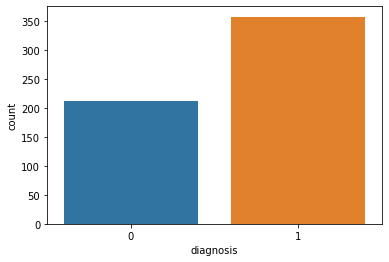

In [10]:
#lets visualize the count, that is 0 and 1 in comparisms
sns.countplot(data['diagnosis'], label='count')

#clearly we have more patient with cancer than without cancer

In [11]:
#Lets look at the data types to see which columns need to be encoded
data.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

#### No column needs encoding

C:\Users\User\Anaconda3\Anaconda File\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\Anaconda File\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


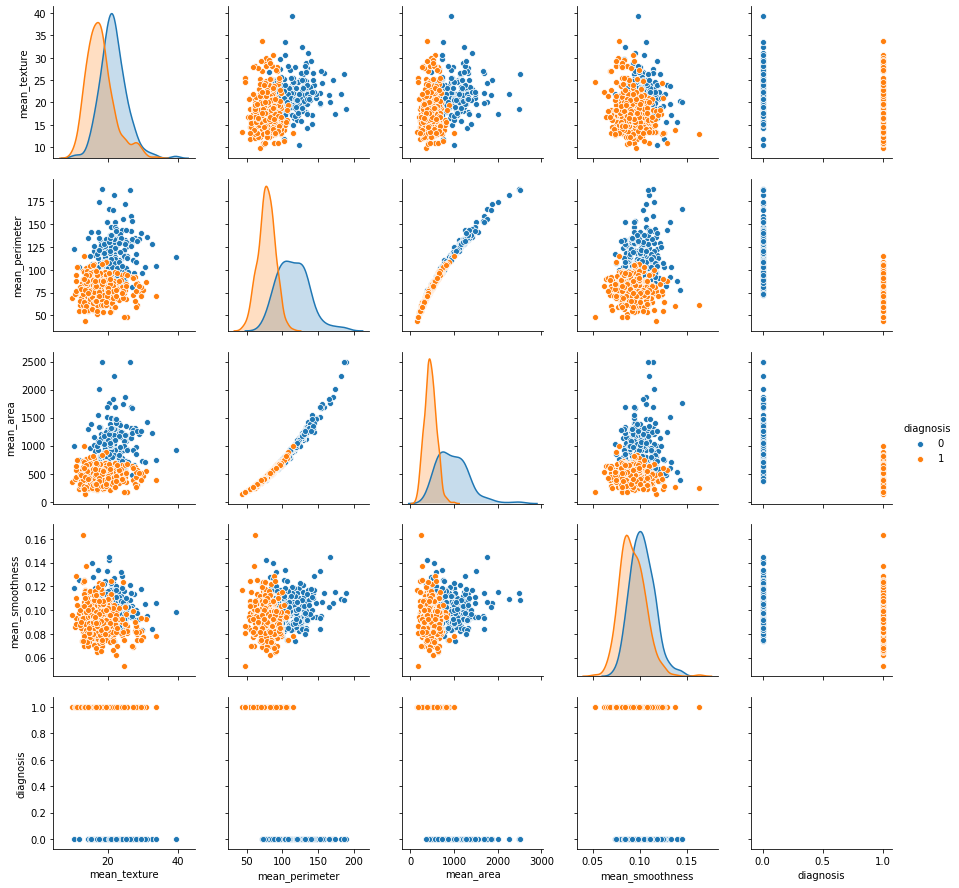

In [12]:
#create a pair plot
sns.pairplot(data.iloc[:,1:7], hue='diagnosis')

In [13]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [14]:
#lets look at the correlation
data.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


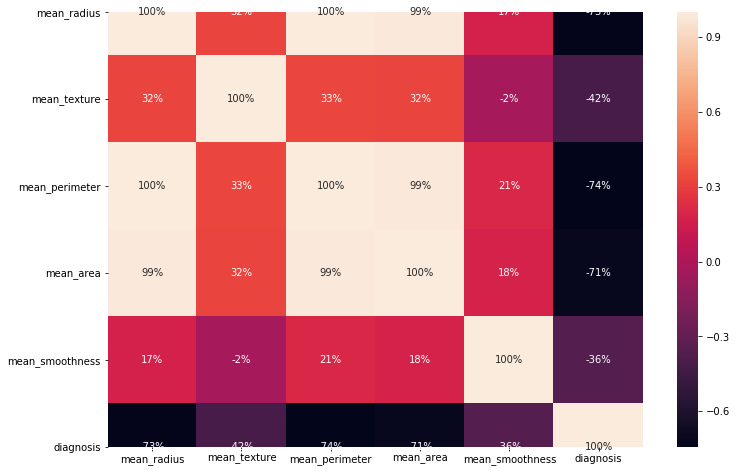

In [15]:
#lets visualize the correlation usin heatmaps
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt='.0%')
plt.show()


In [16]:
#Now we split the data set into indepenent variable (x) and dependent variable (y)
X = data.iloc[:, 0:5].values 
#.values changes the values to array, this is done because of the model we are about to use
#all columns except the diagnosis column
Y = data.iloc[:,5].values



In [17]:
#we want to train our model with 75% of the data and test with 25% 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25 , random_state = 0)

In [18]:
#lets scale the data so all the data falls in the same range.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train

array([[-0.65079907, -0.43057322, -0.68024847, -0.62698309, -0.91381897],
       [-0.82835341,  0.15226547, -0.82773762, -0.75309358,  0.65281216],
       [ 1.68277234,  2.18977235,  1.60009756,  1.67383892,  0.10362413],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , -1.05503654,  0.32763504],
       [-1.25110186, -0.24600763, -1.28700242, -1.02864778, -1.94137868],
       [-0.74662205,  1.14066273, -0.72203706, -0.7080938 , -0.27141349]])

In [19]:
#create a function for the model
def models(X_train, Y_train):
    #logistic regregression 
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    #decision tree
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(X_train, Y_train)
    
    #Random forest classifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
    #print model accuracy
    print('[0]Logistic Regression training accuracy:', log.score(X_train, Y_train))
    print('[1]Decision Tree Classifier training acccuracy:', tree.score(X_train, Y_train))
    print('[1]Random Forest Classifier training acccuracy:', forest.score(X_train, Y_train))
    
    return log, tree, forest

In [20]:
#get all the models
model = models(X_train, Y_train)

[0]Logistic Regression training accuracy: 0.9366197183098591
[1]Decision Tree Classifier training acccuracy: 1.0
[1]Random Forest Classifier training acccuracy: 0.9906103286384976


C:\Users\User\Anaconda3\Anaconda File\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Decision tree did the best giving us a 100% accuracy followed by Random forest classifier and then logistics regression

In [21]:
#Test model accuracy on test data on confusion matrix
for i in range( len(model) ):
    print('Model ', i)
    cm = confusion_matrix(Y_test, model[i].predict(X_test))

    TP = cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    print(cm)
    print('testing accuracy = ', (TP + TN)/ (TP + TN + FN + FP))
    print()

Model  0
[[48  5]
 [ 7 83]]
testing accuracy =  0.916083916083916

Model  1
[[48  5]
 [ 9 81]]
testing accuracy =  0.9020979020979021

Model  2
[[49  4]
 [ 9 81]]
testing accuracy =  0.9090909090909091



In [22]:
#print the prediction of the logistics regression model since it did the best
pred = model[0].predict(X_test)
print(pred) #predicted if the patient have cancer or not
print() #printed an empty line
print(Y_test) #the actual values from our dataset

[0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1
 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0]

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


In [23]:
print('mean absolute error:', metrics.mean_absolute_error(Y_test, pred))

mean absolute error: 0.08391608391608392


In [24]:
pickle.dump(model[0], open('model.pkl', 'wb'))

In [26]:
model = pickle.load(open('model.pkl', 'rb'))
print(model.predict([[13.08, 15.71, 195.63, 5000, 0.1075]]))


[0]


In [27]:
import os
os.system('jupyter nbconvert --to html project.ipynb')

0